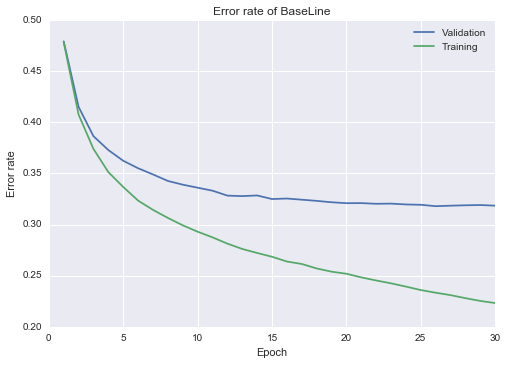

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

epoch = np.linspace(1, 30, 30)

filename = './baseline'
val_acc = np.load(os.path.join(filename, 'val_accuracies.npy'))

val_step = np.load(os.path.join(filename, 'val_steps.npy'))
val_err = 1 - val_acc
val, = plt.plot(epoch, val_err, label='Validation')

train_acc = np.load(os.path.join(filename, 'train_accuracies.npy'))
train_step = np.load(os.path.join(filename, 'train_steps.npy'))
train_err = 1 - train_acc
train, = plt.plot(epoch, train_err, label='Training')

#plt.plot(val_step, val_err, train_step, train_err)
plt.title('Error rate of BaseLine')
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.legend(handles=[val, train])
plt.show()


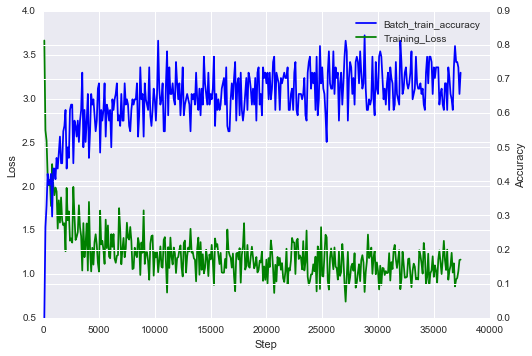

In [2]:
fig, ax1 = plt.subplots()

tr_acc = np.load(os.path.join(filename, 'tr_accuracy.npy'))
tr_loss = np.load(os.path.join(filename, 'tr_loss.npy'))
step = tr_loss.shape[0]
steps = np.linspace(1, step, step)*100

loss, = ax1.plot(steps, tr_loss, 'g', label='Training_Loss')
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss')
ax2 = ax1.twinx()
acc, = ax2.plot(steps, tr_acc, 'b', label='Batch_train_accuracy')
ax2.set_ylabel('Accuracy')


plt.legend(handles=[acc, loss])
plt.show()

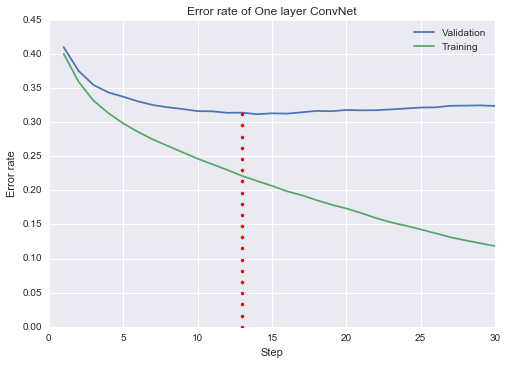

In [16]:
# Validation & Train error rate of one layer ConvNet

filename = './psize_6'
val_acc = np.load(os.path.join(filename, 'val_accuracies.npy'))

val_step = np.load(os.path.join(filename, 'val_steps.npy'))
val_err = 1 - val_acc
val, = plt.plot(epoch, val_err, label='Validation')

index = np.argmin(val_err)
x = np.ones(20)*index
y = np.linspace(0, val_err[index], 20)
plt.plot(x, y, 'r.')

train_acc = np.load(os.path.join(filename, 'train_accuracies.npy'))
train_step = np.load(os.path.join(filename, 'train_steps.npy'))
train_err = 1 - train_acc
train, = plt.plot(epoch, train_err, label='Training')

#plt.plot(val_step, val_err, train_step, train_err)
plt.title('Error rate of One layer ConvNet')
plt.xlabel('Step')
plt.ylabel('Error rate')
plt.legend(handles=[val, train])
plt.show()

In [ ]:
%matplotlib inline
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

epoch = np.linspace(1, 30, 30)

#filenames = ['./ksize_quarter', './ksize_half', './baseline', './ksize_2x', './ksize_4x' ]
filenames = ['./ksize_quarter', './baseline', './ksize_2x', './ksize_4x' ]

val_acc_ksizes = []
train_acc_ksizes = []
for fn in filenames:

    acc = np.load(os.path.join(fn, 'val_accuracies.npy'))
    val_err = 1 - np.mean(acc[-5:])
    val_acc_ksizes.append(val_err)
    
    #acc = np.load(os.path.join(fn, 'train_accuracies.npy'))
    #val_err = 1 - np.mean(acc[-5:])
    #train_acc_ksizes.append(val_err)
    
fig, ax = plt.subplots()

#labels = ['1/4', '', '1/2', '', 'Baseline', '', '2x', '', '4x']
labels = ['1/4', '', 'Baseline', '', '2x', '', '4x']
ax.set_xticklabels(labels)
val, = plt.plot(val_acc_ksizes, label='Validation')
#train, = plt.plot(val_acc_ksizes, label='Training')

plt.xlabel('Kernel size')
plt.ylabel('Error rate')
plt.legend(handles=[val])
plt.show()